# Imports

In [130]:
import csv
import pandas as pd
import numpy as np
import ast
from sqlalchemy import create_engine
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

# Import Yelp Data

In [2]:
business = pd.read_csv('/Users/cyrusrustomji/Downloads/yelp_business.csv')[['business_id','name','address','city','state','postal_code','stars','review_count','is_open','categories']]
hours = pd.read_csv('/Users/cyrusrustomji/Downloads/yelp_business_hours.csv')
business.head()

,business_id,name,address,city,state,postal_code,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,15317,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,44221,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [3]:
# use toronto because in vegas people eat out
business.city.value_counts().head()

Las Vegas     26775
Phoenix       17213
Toronto       17206
Charlotte      8553
Scottsdale     8228
Name: city, dtype: int64

In [4]:
business = business[business.city == 'Toronto']
# combine = business.merge(hours, left_on='business_id', right_on='business_id', how='left')

In [6]:
toronto = pd.read_csv('../Data/y_business.csv')
# toronto = toronto.drop(columns=['open','close'])
toronto.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,final
0,VnibgMdZkBqnMDnY4BWPUg,"""Naan and Kabob""",Scarborough,"""1780 Markham Road""",Toronto,ON,M1B 2W2,43.795206,-79.239781,4.0,12,1,"[""Afghan"",""Halal"",""Middle Eastern"",""Restaurant..."
1,T0ju0drMLfXJPNLnEsEYgw,"""Pizza Hot Wings""",Scarborough,"""3007 Sheppard Avenue E""",Toronto,ON,M1T 3J5,43.776407,-79.318135,3.5,3,0,"[""Afghan"",""Halal"",""Pizza"",""Restaurants"","""","""",..."
2,VtQIAj8eXvHqc_8MtMMGwg,"""Afghan Cuisine""",NaN,"""66 Overlea Boulevard, Unit 62""",Toronto,ON,M4H 1C4,43.708070,-79.341508,4.0,30,1,"[""Afghan"",""Persian/Iranian"",""Halal"",""Restauran..."
3,tQKRXnzWZllD4M3toa-UaQ,"""Taftan Kebab""",Willowdale,"""5372 Yonge Street""",Toronto,ON,M2N 5R5,43.774496,-79.414301,3.0,41,1,"[""Afghan"",""Persian/Iranian"",""Middle Eastern"",""..."
4,d2k0I5mbDiOYrCAjJLLMiQ,"""Mazar Kabob""",Etobicoke,"""133 The West Mall, Unit 1""",Toronto,ON,M9C,43.619813,-79.561822,4.5,9,1,"[""Afghan"",""Restaurants"","""","""","""","""","""","""","""",""..."


# Clean Yelp Data

In [7]:
toronto['categories'] = toronto['final']

In [8]:
# make items in the categories column a list instead of a string
i = 0
for y in toronto.categories:
    if type(y) == str:
        toronto.categories[i] = ast.literal_eval(y)
    i +=1

/Users/cyrusrustomji/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [121]:
# put all categories in a list

lst = []
categories = []
for j in toronto.categories:
    for x in j:
        lst.append(x)
for item in lst:
    if item not in categories:
        categories.append(item)
categories

['Organic Stores',
 'Food',
 'Health Markets',
 'Specialty Food',
 '',
 'Meat Shops',
 'Grocery',
 'OrganicStores',
 'Juice Bars & Smoothies',
 'Specialty Schools',
 'Caterers',
 'Event Planning & Services',
 'Cooking Schools',
 'Party&EventPlanning',
 'Education',
 'Beer',
 'Wine & Spirits',
 'Bars',
 'Nightlife',
 'Ice Cream & Frozen Yogurt',
 'Bakeries',
 'Gluten-Free',
 'Restaurants',
 'Cafes',
 'Desserts',
 'Breakfast & Brunch',
 'Coffee & Tea',
 'Chinese',
 'Russian',
 'Ukrainian',
 'Caribbean',
 'German',
 'WineTours',
 'Hotels & Travel',
 'Wineries',
 'Arts & Entertainment',
 'Tours',
 'Butcher',
 'Sporting Goods',
 'Bikes',
 'Shopping',
 'LocalServices',
 'BikeRepair/Maintenance',
 'Sandwiches',
 'SeafoodMarkets',
 'Chicken Wings',
 'Southern',
 'Fast Food',
 'Middle Eastern',
 'Venezuelan',
 'Latin American',
 'Delis',
 'Salad',
 'Live/RawFood',
 'Modern European',
 'Pizza',
 'Korean',
 'Asian Fusion',
 'Diners',
 'American',
 'Kosher',
 'Seafood',
 'Mediterranean',
 'Coffee 

In [9]:
# put stars in a lst

five = 0
four_five = 0
four = 0
three_five = 0
three = 0
two_five = 0
two = 0
one_five = 0
one = 0
lst = []
for x in toronto.stars:
    if x == 5.0:
        five += 1
    if x == 4.5:
        four_five += 1
    if x == 4:
        four += 1
    if x == 3.5:
        three_five += 1
    if x == 3.0:
        three += 1
    if x == 2.5:
        two_five += 1
    if x == 2.0:
        two += 1
    if x == 1.5:
        one_five += 1
    if x == 1:
        one += 1
lst.append(five)
lst.append(four_five)
lst.append(four)
lst.append(three_five)
lst.append(three)
lst.append(two_five)
lst.append(two)
lst.append(one_five)
lst.append(one)
lst

[261, 1002, 2268, 2421, 1859, 887, 443, 163, 45]

In [10]:
# stars vs count of stars

df_stars = pd.DataFrame({'Stars': lst,'Count of Stars': toronto.stars.unique()})
df_stars

,Stars,Count of Stars
0,261,4.0
1,1002,3.5
2,2268,3.0
3,2421,4.5
4,1859,5.0
5,887,2.5
6,443,2.0
7,163,1.5
8,45,1.0


In [11]:
# create a dataframe for only 5 star restaurants

most_stars = toronto.drop(columns=['business_id','neighborhood','address','city','state','postal_code','latitude','longitude','is_open','final'])
most_stars = most_stars.sort_values(by=['stars','review_count'],ascending=False)
most_stars = most_stars[most_stars.stars == 5.0]
most_stars

,name,stars,review_count,categories
4417,"""Baretto Caffe""",5.0,187,"[Italian, Cafes, Restaurants, , , , , , , , , ..."
8805,"""New Orleans Seafood & Steakhouse""",5.0,68,"[Steakhouses, Cajun/Creole, Seafood, Restauran..."
3739,"""Kozlik's Canadian Mustard""",5.0,64,"[Food, Specialty Food, , , , , , , , , , , , , ]"
9185,"""Veghed""",5.0,48,"[Vegan, Vegetarian, Restaurants, , , , , , , ,..."
925,"""Zeal Burgers""",5.0,41,"[Burgers, Restaurants, , , , , , , , , , , , , ]"
4983,"""Yelp Gets Lit""",5.0,41,"[Local Flavor, YelpEvents, , , , , , , , , , ,..."
139,"""Teta's Mediterranean Kitchen & Bakery""",5.0,38,"[Arabian, Mediterranean, Bakeries, Middle East..."
2504,"""Wild North Flowers""",5.0,34,"[Event Planning & Services, Shopping, Florists..."
1022,"""Wallace Espresso""",5.0,33,"[Cafes, Food, Restaurants, Coffee & Tea, , , ,..."
4834,"""Salus Fresh Foods""",5.0,33,"[Juice Bars & Smoothies, Salad, Food, Restaura..."


In [12]:
# read in all categories 

a = pd.read_csv('final_categories.csv')
final_categories = []
for x in a.Category:
    final_categories.append(x)
final_categories

['Afghan',
 'African',
 'Airportlounges',
 'American',
 'Arabian',
 'Arcades',
 'Argentine',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bagels',
 'Bakeries',
 'Bangladeshi',
 'Barbeque',
 'Bars',
 'Basque',
 'Bed&Breakfast',
 'Beer',
 'Beer Bar',
 'Beergardens',
 'Beerhall',
 'Belgian',
 'Bistros',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'Brewing Supplies',
 'Brewpubs',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Butcher',
 'Cabaret',
 'Cafes',
 'Cafeteria',
 'Cajun/Creole',
 'Cambodian',
 'Canadian',
 'Canadian ',
 'Candy Stores',
 'Candystores',
 'Cantonese',
 'Caribbean',
 'Caterers',
 'Champagnebars',
 'Cheese Shops',
 'Cheeseshops',
 'Cheesesteaks',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Chocolatiers & Shops',
 'Churches',
 'Cideries',
 'Cocktail Bars',
 'Coffee & Tea',
 'Coffee & Tea Supplies',
 'Coffee Roasteries',
 'Colleges&Universities',
 'Colombian',
 'Comfort Food',
 'Convenience Stores',
 'Cooking Schools',
 'Cr

In [13]:
toronto = toronto.sort_values(by=['stars'],ascending=False)
toronto

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,final,categories
5623,D2SPZOCER3TLIsrYywMpYQ,"""Raise the Root Organic Market""",Leslieville,"""1164 Queen Street E""",Toronto,ON,M4M 1L4,43.662724,-79.332594,5.0,5,1,"[""Organic Stores"",""Food"",""Health Markets"",""Spe...","[Organic Stores, Food, Health Markets, Special..."
3604,tJqPUAk3xU6IkFgagpD92A,"""Di Liso's Fine Meats""",St. Lawrence,"""91 Front Street E""",Toronto,ON,M5E 1C3,43.648923,-79.371723,5.0,4,1,"[""Food"",""Meat Shops"",""Specialty Food"","""","""",""""...","[Food, Meat Shops, Specialty Food, , , , , , ,..."
5036,rYhgn9JU8E_RxXWzzUiAGA,"""Macelleria Atlas Butcher Shop""",NaN,"""800 St Clair Avenue W""",Toronto,ON,M6C 1B6,43.680986,-79.429997,5.0,5,1,"[""Meat Shops"",""Food"",""Specialty Food"","""","""",""""...","[Meat Shops, Food, Specialty Food, , , , , , ,..."
4110,4wlqqIbuNOEFn8ub4dJxlQ,"""The Healthy Road""",Corktown,"""518 King Street E""",Toronto,ON,M5A 1M1,43.656381,-79.357038,5.0,5,1,"[""Grocery"",""OrganicStores"",""Food"","""","""","""","""",...","[Grocery, OrganicStores, Food, , , , , , , , ,..."
3576,NrFsdILQztHSlIUNra82nQ,"""Juice Box""",Church-Wellesley Village,"""491 Church St""",Toronto,ON,M4Y 2C6,43.665187,-79.380587,5.0,12,1,"[""Food"",""Juice Bars & Smoothies"","""","""","""","""",""...","[Food, Juice Bars & Smoothies, , , , , , , , ,..."
8705,Nvj_rKyKainH4QDPU59AIg,"""Elle Cuisine""",Riverdale,"""56 Hampton Avenue""",Toronto,ON,M4K 2Y5,43.673511,-79.351334,5.0,3,1,"[""Specialty Schools"",""Caterers"",""Event Plannin...","[Specialty Schools, Caterers, Event Planning &..."
2889,dy-qs8C-BuHtFDhvY4GYng,"""LCBO""",Little Italy,"""549 College Street""",Toronto,ON,M6G 1A9,43.655612,-79.411883,5.0,4,1,"[""Food"",""Beer"",""Wine & Spirits"","""","""","""","""",""""...","[Food, Beer, Wine & Spirits, , , , , , , , , ,..."
3587,InNbPyC-wZli-CcLdaitFQ,"""Booster Juice""",Scarborough,"""300 Borough Drive""",Toronto,ON,M1P,43.776875,-79.256655,5.0,3,1,"[""Food"",""Juice Bars & Smoothies"","""","""","""","""",""...","[Food, Juice Bars & Smoothies, , , , , , , , ,..."
2864,rcOzQrCZaX7IbocXmD-M9Q,"""York Station Bar""",Financial District,"""100 Front Street W""",Toronto,ON,M5J 1E3,43.645905,-79.381464,5.0,10,0,"[""Food"",""Bars"",""Nightlife"","""","""","""","""","""","""",""...","[Food, Bars, Nightlife, , , , , , , , , , , , ]"
4104,6kIlmP82sIq2jxhNGUkEtg,"""St Patricks Mini Mart""",Downtown Core,"""20 St Patrick Street""",Toronto,ON,M5T 2Y4,43.650943,-79.389171,5.0,5,1,"[""Grocery"",""Ice Cream & Frozen Yogurt"",""Food"",...","[Grocery, Ice Cream & Frozen Yogurt, Food, , ,..."


In [89]:
name = []
category = []

for i, n in enumerate(toronto.categories):
    for x in n:
        for y in final_categories:
            if x == y:
                name.append(toronto.iloc[i,1])
                category.append(x)
                
a = pd.DataFrame({
    'name': name,
    'category': category
})
# a = a.merge(toronto,left_on='name',right_on='name',how='left')[['name','category','stars']]

In [90]:
a.to_csv('name_category_stars.csv',index=False, header=False)

In [94]:
dc = '.'.join(final_categories)
dc

'Afghan.African.Airportlounges.American.Arabian.Arcades.Argentine.Asian Fusion.Australian.Austrian.Bagels.Bakeries.Bangladeshi.Barbeque.Bars.Basque.Bed&Breakfast.Beer.Beer Bar.Beergardens.Beerhall.Belgian.Bistros.Brasseries.Brazilian.Breakfast & Brunch.Breweries.Brewing Supplies.Brewpubs.British.Bubble Tea.Buffets.Burgers.Burmese.Butcher.Cabaret.Cafes.Cafeteria.Cajun/Creole.Cambodian.Canadian.Canadian .Candy Stores.Candystores.Cantonese.Caribbean.Caterers.Champagnebars.Cheese Shops.Cheeseshops.Cheesesteaks.Chicken Shop.Chicken Wings.Chinese.Chocolatiers & Shops.Churches.Cideries.Cocktail Bars.Coffee & Tea.Coffee & Tea Supplies.Coffee Roasteries.Colleges&Universities.Colombian.Comfort Food.Convenience Stores.Cooking Schools.Creperies.Cuban.Cupcakes.Custom Cakes.Customcakes.Czech.Czech/Slovakian.Delicatessen.Delis.Desserts.Dim Sum.Dimsum.Diners.Dinnertheater.Discount Store.Discountstore.Distilleries.Dive Bars.Do-It-Yourself Food.Do-It-Yourselffood.Donairs.Donuts.Egyptian.Ethical Grocery.

In [140]:
b = pd.read_csv('final.csv')
final = []
for x in b.category:
    final.append(x)
dc = '.'.join(final)
dc

'Meatshops.Meatshops.Caterers.Bakeries.Glutenfree.Bakeries.Cafes.Desserts.Breakfastbrunch.Bakeries.Cafes.Coffeetea.Bakeries.Desserts.Meatshops.Chinese.Russian.Ukrainian.Chinese.Caribbean.German.Bakeries.Bakeries.Meatshops.Meatshops.Butcher.Caribbean.Coffeetea.Cafes.Coffeetea.Sandwiches.Desserts.Coffeetea.Desserts.Butcher.Bakeries.Chickenwings.Southern.Fastfood.Meatshops.Middleeastern.Coffeetea.Venezuelan.Sandwiches.Coffeetea.Latinamerican.Cafes.Meatshops.Delis.Salad.Live/Rawfood.Bakeries.Moderneuropean.Pizza.Korean.Asianfusion.Korean.Diners.American.Coffeetea.Breakfastbrunch.Cafes.Kosher.Coffeetea.Cafes.Seafood.Coffeetea.Bakeries.Cafes.Sandwiches.Mediterranean.Middleeastern.Coffeetea.Middleeastern.Cafes.Cafes.Cafes.Indian.Sandwiches.Coffeetea.Italian.Fastfood.Kosher.Bakeries.Cafes.Bakeries.Meatshops.Mediterranean.Barbeque.Halal.Sandwiches.Caterers.Indian.Comfortfood.Chickenshop.American.Mediterranean.Italian.Breakfastbrunch.Italian.Greek.Vegan.Middleeastern.Cafes.Bakeries.Cafes.Coffeet

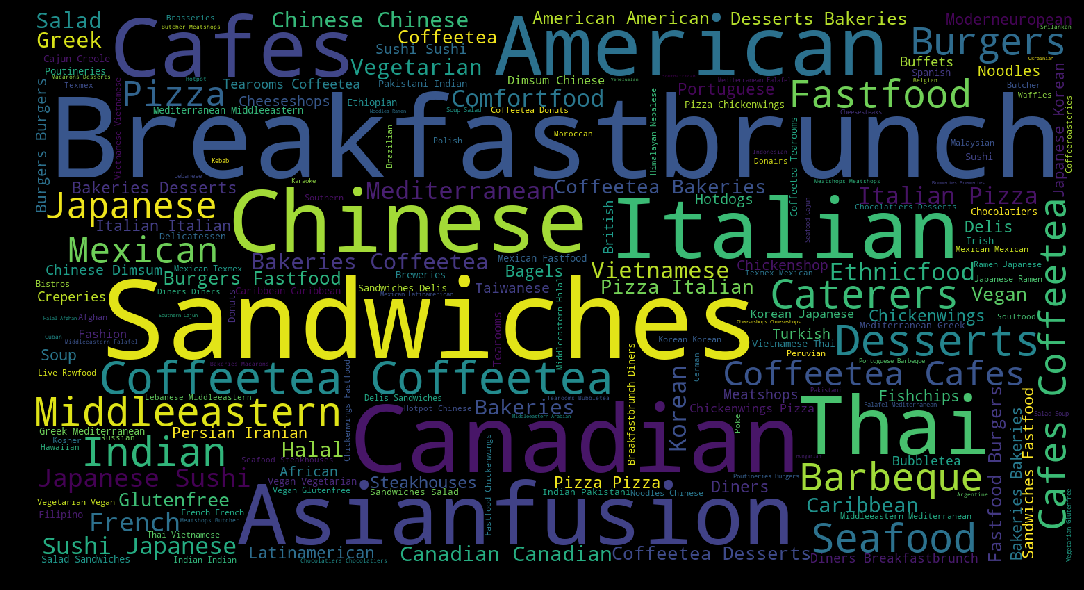

In [143]:
wordcloud = WordCloud(
        
                          background_color='black',
                          width=1500,
                          height=800).generate(dc)


plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
# plt.savefig("wordcloud.png")